In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_participation = "participation.xlsx"
file_enrollment = 'enrollment.xlsx'

excel_participation = pd.ExcelFile(file_participation)
excel_enrollment = pd.ExcelFile(file_enrollment)

participation = {}
for year in excel_participation.sheet_names: #creates dicts to store each pandas sheet for year ex. participation[2007] gives 2007
    participation[year] = pd.read_excel(file_participation, sheet_name=year, index_col=1, header=None, names=['School', 'Takers', 'Tests', '1', '2', '3', '4', '5+'])
    participation[year].index.names = ['ID']

enrollment = {} 
for year in excel_enrollment.sheet_names:##creates dicts to store each pandas sheet for year
    enrollment[year] = pd.read_excel(excel_enrollment, sheet_name=year, index_col=1, header=None)
    if year!='rankings':
        enrollment[year]['9-12'] = enrollment[year][12]+enrollment[year][13]+enrollment[year][14]+enrollment[year][15]
        enrollment[year].drop([0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], axis=1, inplace=True)
        enrollment[year] = enrollment[year][enrollment[year]['9-12'] != 0]
    if year=='rankings':
        enrollment[year].columns = ['School', 'state_rank', 'national_rank']
        enrollment[year] = enrollment[year].dropna()
    enrollment[year].index.names = ['ID']


In [3]:
relatives = {}
for year in excel_participation.sheet_names:
    relatives['enrollment' + year] = pd.DataFrame()
    relatives['takers' + year] = pd.DataFrame()
    relatives['tests' + year] = pd.DataFrame()


In [19]:
participation_reference = {}
for year in excel_participation.sheet_names:
# if 1>0:
    participation_reference[year] = pd.concat([participation[year]['1'],
                participation[year]['2'],
                participation[year]['3'],
                participation[year]['4'],
                participation[year]['5+']],
                axis=1,)
    participation_reference[year]['1+'] = participation[year]['1'] + participation[year]['2'] + participation[year]['3'] + participation[year]['4'] + participation[year]['5+']
    participation_reference[year]['2+'] = participation[year]['2'] + participation[year]['3'] + participation[year]['4'] + participation[year]['5+']
    participation_reference[year]['3+'] = participation[year]['3'] + participation[year]['4'] + participation[year]['5+']
    participation_reference[year]['4+'] = participation[year]['4'] + participation[year]['5+']
    for i in participation_reference[year].columns:
        relatives['enrollment' + year][i] = participation_reference[year][i] / enrollment[year]['9-12'] * 100
        relatives['takers' + year][i] = participation_reference[year][i] / participation[year]['Takers'] * 100
        relatives['tests' + year][i] = participation_reference[year][i] / participation[year]['Tests'] * 100
        relative_to = [relatives['enrollment' + year], relatives['takers' + year], relatives['tests' + year]]
        for x in relative_to:
            x['School'] = participation[year]['School']
            y = pd.DataFrame() ## creates the district column by splitting the school column
            y['a'] = participation[year]['School'].str.split()
            y.stack().str[0].unstack()
            x['District'] = y['a']
            if int(year)>2013:
                x['state_rank'] = enrollment['rankings']['state_rank']
                x['national_rank'] = enrollment['rankings']['national_rank']
        relative_to=None


In [57]:
charted = relatives['enrollment2017']
chosen_column = '4+'
index = False

xcolumn = 'School'
if index==True:
    xcolumn = charted.index
charted = charted.sort_values([chosen_column], ascending=False)

In [18]:
y = pd.DataFrame()
y['a'] = participation['2017']['School'].str.split()
y.stack().str[0].unstack()


,a
ID,
10505,Abington
4120530,Academy
6000505,Acton-Boxborough
6030505,Adams-Cheshire
4300305,Advanced
50505,Agawam
70505,Amesbury
6050505,Amherst-Pelham
90505,Andover


In [35]:
charted

,1,School,state_rank,national_rank,2,3,4,5+,1+,2+,3+,4+
ID,,,,,,,,,,,,
350560,27.239264,Boston - Boston Latin,1.0,33.0,16.871166,11.963190,6.196319,1.349693,63.619632,36.380368,19.509202,7.546012
1390505,17.889908,Hopkinton - Hopkinton High,6.0,266.0,11.100917,7.247706,5.321101,1.376147,42.935780,25.045872,13.944954,6.697248
6550505,8.282209,Dover-Sherborn - Dover-Sherborn Regional High,7.0,288.0,9.815951,6.901840,4.601227,1.380368,30.981595,22.699387,12.883436,5.981595
4300305,24.899598,Advanced Math and Science Academy Charter (Dis...,2.0,157.0,16.265060,11.244980,4.016064,1.807229,58.232932,33.333333,17.068273,5.823293
260505,12.816456,Belmont - Belmont High,9.0,413.0,11.234177,7.120253,4.193038,1.582278,36.946203,24.129747,12.895570,5.775316
3440505,7.570978,Winchester - Winchester High School,16.0,511.0,4.100946,3.391167,2.681388,3.075710,20.820189,13.249211,9.148265,5.757098
4850485,5.752212,Salem Academy Charter (District) - Salem Acade...,NaN,NaN,3.982301,6.194690,4.867257,0.442478,21.238938,15.486726,11.504425,5.309735
4680505,23.711340,Ma Academy for Math and Science - Ma Academy f...,NaN,NaN,8.247423,3.092784,4.123711,1.030928,40.206186,16.494845,8.247423,5.154639
1590505,7.505285,Longmeadow - Longmeadow High,NaN,NaN,6.342495,3.488372,2.325581,2.431290,22.093023,14.587738,8.245243,4.756871


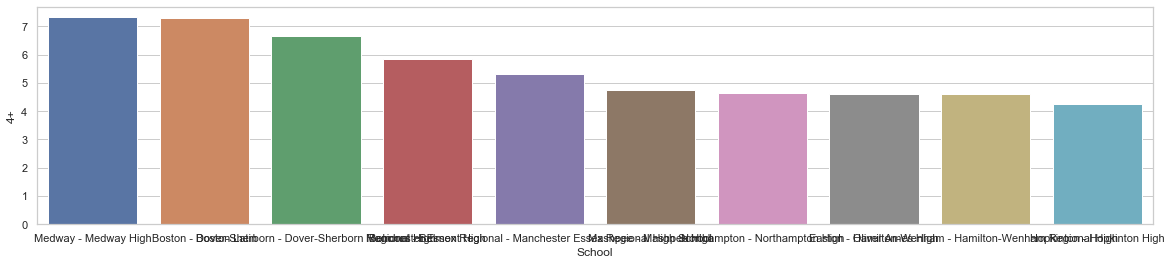

In [52]:
charted = charted.head(10)
sns.set(style="whitegrid")
plt.subplots(figsize=(20,4))
sns.barplot(x=xcolumn, y=chosen_column, data=charted)
plt.show()

In [63]:
for years in ['2014','2015','2016','2017']:
    sns.scatterplot(x="national_rank", y='3+', data=relatives['enrollment'+year])
    
plt.show()

# sns.scatterplot(x="national_rank", y='4+', data=charted)
# plt.show()

# sns.scatterplot(x="national_rank", y='5+', data=charted)
# plt.show()

ValueError: Could not interpret input 'national_rank'

C:\Users\elanr\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\elanr\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


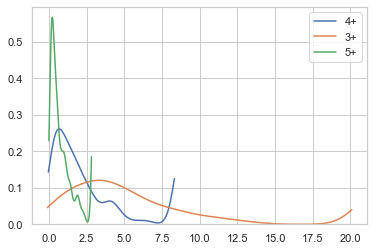

In [58]:
cut_number = .1
sns.kdeplot(charted['4+'], cut=cut_number)
sns.kdeplot(charted['3+'], cut=cut_number)
sns.kdeplot(charted['5+'], cut=cut_number)
plt.show()

3